## Final Project Submission

* Student name: Erica Gabriel
* Student pace: self paced / part time / full time: Full Time
* Scheduled project review date/time: TBD 
* Instructor name: Rafael Carrasco
* Blog post URL: TBD


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

**Dataset: imdb.name.basics.csv.gz

In [3]:
imdb_name_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip')
imdb_name_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [4]:
#Data Cleaning
#print(imdb_name_df.describe())
imdb_name_df.info() #Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [4]:
imdb_name_df = imdb_name_df.drop(columns=['birth_year', 'death_year']) #Both of these columns are missing ~85%+ values 
imdb_name_df.head()

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
for column in imdb_name_df.columns: #replace missing values in remaining columns with their modes
    imdb_name_df[column].fillna(imdb_name_df[column].mode()[0], inplace=True)
imdb_name_df.head()

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [6]:
imdb_name_df.info() #Last check for null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
primary_profession    606648 non-null object
known_for_titles      606648 non-null object
dtypes: object(4)
memory usage: 18.5+ MB


In [7]:
duplicates = imdb_name_df[imdb_name_df.duplicated()] #Check for duplicate rows
print(len(duplicates))
duplicates.head()

0


,nconst,primary_name,primary_profession,known_for_titles


In [8]:
for col in imdb_name_df.columns: #check for extraneous values
    print(col, '\n', imdb_name_df[col].value_counts().head(), '\n\n')

nconst 
 nm4383902    1
nm7700280    1
nm1973897    1
nm8475914    1
nm0760997    1
Name: nconst, dtype: int64 


primary_name 
 James Brown        16
Michael Brown      16
David Brown        15
Michael Johnson    14
Mark Davis         13
Name: primary_name, dtype: int64 


primary_profession 
 actor       139646
actress      58430
producer     23324
composer     20125
writer       18247
Name: primary_profession, dtype: int64 


known_for_titles 
 tt4773466    30249
tt3014460       23
tt3428990       23
tt4803104       19
tt2120166       17
Name: known_for_titles, dtype: int64 




In [9]:
#imdb_name_df['primary_name'].value_counts()
duplicates = imdb_name_df[imdb_name_df.duplicated(subset='primary_name')]
print(len(duplicates))
duplicates.head(10) #Its common for people to share names, will ignore for now

29445


,nconst,primary_name,primary_profession,known_for_titles
917,nm0680884,Bill Phillips,actor,"tt4878612,tt0203259,tt1856010,tt5030402"
4302,nm0414481,Jon Jacobs,"actor,director,writer","tt0322621,tt0165866,tt2311530,tt0137268"
5201,nm10372561,John Thomas,director,tt4773466
5993,nm0298181,Brad Fuller,"producer,executive","tt1291150,tt6133466,tt2436386,tt6644200"
6660,nm0852888,Michael Taylor,"producer,miscellaneous,writer","tt0117333,tt0115734,tt0128278,tt0079437"
8780,nm10308934,Bill Johnson,actor,tt4773466
9108,nm1084711,John Williams,"director,writer,cinematographer","tt0296172,tt1543224,tt0479926,tt3064356"
9570,nm0173433,Eric Colvin,"composer,music_department,miscellaneous","tt0120201,tt0118771,tt0147800,tt0119345"
9860,nm0430803,Mohan Joshi,actor,"tt0172574,tt6363784,tt0309618,tt0133024"
10393,nm10002165,Denis Chernov,actor,tt4773466


**Dataset: bom.movie_gross.csv.gz

In [10]:
Bom_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
Bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
Bom_gross_df.info() #check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
Bom_gross_df['domestic_gross'] = Bom_gross_df['domestic_gross'].fillna(Bom_gross_df['domestic_gross'].median()) #replace NaNs with median values

In [13]:
for column in Bom_gross_df.columns: #replace missing values in remaining columns with their modes
    Bom_gross_df[column].fillna(Bom_gross_df[column].mode()[0], inplace=True)
Bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [28]:
#Bom_gross_df['foreign_gross'] = [int(i) for i in Bom_gross_df['foreign_gross']] Why does this work?

In [14]:
Bom_gross_df.info() #Last NaN check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3387 non-null object
domestic_gross    3387 non-null float64
foreign_gross     3387 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
duplicates = Bom_gross_df[Bom_gross_df.duplicated()] #Check for duplicate rows
print(len(duplicates))
duplicates.head()


0


,title,studio,domestic_gross,foreign_gross,year


In [16]:
duplicates = Bom_gross_df[Bom_gross_df.duplicated(subset='title')] #Check for duplicate rows
print(len(duplicates)) #print count of duplicate titles
duplicates.head()

1


,title,studio,domestic_gross,foreign_gross,year
3045,Bluebeard,WGUSA,43100.0,1200000,2017


In [17]:
duplicates.drop_duplicates(keep='last') #drop all duplicates except the last duplicate row

,title,studio,domestic_gross,foreign_gross,year
3045,Bluebeard,WGUSA,43100.0,1200000,2017


In [118]:
#Bom_gross_df.info() #Revisit to check drop of the duplicate row

In [18]:
for col in Bom_gross_df.columns: #check for extraneous values
    print(col, '\n', Bom_gross_df[col].value_counts().head(), '\n\n')

title 
 Bluebeard              2
The Missing Picture    1
Salinger               1
For a Woman            1
Mia Madre              1
Name: title, dtype: int64 


studio 
 IFC      171
Uni.     147
WB       140
Fox      136
Magn.    136
Name: studio, dtype: int64 


domestic_gross 
 1400000.0    51
1100000.0    32
1000000.0    30
1300000.0    30
1200000.0    25
Name: domestic_gross, dtype: int64 


foreign_gross 
 1200000    1373
1100000      14
4200000      12
1900000      12
2500000      11
Name: foreign_gross, dtype: int64 


year 
 2015    450
2016    436
2012    400
2011    399
2014    395
Name: year, dtype: int64 




**Dataset: imdb.title.akas.csv.gz

In [19]:
imdb_titlea_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip')
imdb_titlea_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [20]:
imdb_titlea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [21]:
imdb_titlea_df = imdb_titlea_df.drop(columns=['language', 'attributes']) #Both of these columns are missing ~85%+ values 
imdb_titlea_df.head()

,title_id,ordering,title,region,types,is_original_title
0,tt0369610,10,Джурасик свят,BG,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,imdbDisplay,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,0.0
4,tt0369610,14,Jurassic World,FR,imdbDisplay,0.0


In [22]:
imdb_titlea_df['is_original_title'] = imdb_titlea_df['is_original_title'].fillna(imdb_titlea_df['is_original_title'].median())

In [23]:
for column in imdb_titlea_df.columns: #replace missing values in remaining columns with their modes
    imdb_titlea_df[column].fillna(imdb_titlea_df[column].mode()[0], inplace=True)
imdb_titlea_df.head()

,title_id,ordering,title,region,types,is_original_title
0,tt0369610,10,Джурасик свят,BG,imdbDisplay,0.0
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,imdbDisplay,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,imdbDisplay,0.0
4,tt0369610,14,Jurassic World,FR,imdbDisplay,0.0


In [24]:
imdb_titlea_df.info() #Final NaN check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 6 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               331703 non-null object
types                331703 non-null object
is_original_title    331703 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.2+ MB


In [25]:
duplicates = imdb_titlea_df[imdb_titlea_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,title_id,ordering,title,region,types,is_original_title


In [26]:
for col in imdb_titlea_df.columns: #check for extraneous values
    print(col, '\n', imdb_titlea_df[col].value_counts().head(), '\n\n')

title_id 
 tt2488496    61
tt1201607    55
tt2310332    55
tt2278871    53
tt1790809    53
Name: title_id, dtype: int64 


ordering 
 1    122302
2     44686
3     41608
4     22586
5     15084
Name: ordering, dtype: int64 


title 
 Robin Hood    32
Home          30
Alone         27
Love          25
Broken        25
Name: title, dtype: int64 


region 
 US     104783
XWW     18467
RU      13817
DE      11634
FR      10990
Name: region, dtype: int64 


types 
 imdbDisplay    263717
original        44700
working          8680
alternative      6564
festival         3307
Name: types, dtype: int64 


is_original_title 
 0.0    287003
1.0     44700
Name: is_original_title, dtype: int64 




**Dataset: rt.movie_info.csv.gz

In [27]:
movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', compression= 'gzip')
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [28]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [29]:
duplicates = movie_info_df[movie_info_df.duplicated(subset='synopsis')]
print(len(duplicates)) #Check for duplicates before cleaning
duplicates.drop_duplicates()

62


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,27,NaN,NR,Musical and Performing Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,109,NaN,NR,Comedy|Drama,Mike Figgis,NaN,NaN,NaN,NaN,NaN,55 minutes,NaN
100,128,NaN,NR,Art House and International,Ye Ying|Zhang Li,NaN,NaN,NaN,NaN,NaN,120 minutes,NaN
131,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1362,1758,A group of air crash survivors are stranded in...,PG-13,Action and Adventure|Drama,NaN,Edward Burns|Scott Frank,"Dec 17, 2004","Mar 1, 2005",$,"20,900,803",112 minutes,20th Century Fox
1369,1768,NaN,NR,Documentary,Lina Mannheimer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412,1821,NaN,NR,Art House and International|Comedy|Drama,Roman Bondarchuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1487,1913,NaN,NR,Action and Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
for col in movie_info_df.columns: #check for extraneous values
    print(col, '\n', movie_info_df[col].value_counts().head(), '\n\n')

id 
 2000    1
697     1
673     1
674     1
675     1
Name: id, dtype: int64 


synopsis 
 A group of air crash survivors are stranded in the Mongolian desert with no chance of rescue. Facing a brutal environment, dwindling resources, and an attack by desert smugglers, they realize their only hope is doing the "impossible"--building a new plane from the wreckage.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [31]:
movie_info_df = movie_info_df.drop(columns=['currency', 'studio']) #The 'currency' column has null, NaN, and a placeholder value of $340, the studio column does not add predictive value, Microsoft can Bing "Top Studios" 
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013","600,000",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,128 minutes
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,200 minutes


In [32]:
for column in movie_info_df.columns: #replace missing values in remaining columns with their modes
    movie_info_df[column].fillna(movie_info_df[column].mode()[0], inplace=True) # I kept box office becuase it gives insight to return on investment and is compatible with ML algorithms
movie_info_df.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,Steven Spielberg,Woody Allen,"Aug 18, 2006","Jan 2, 2007","33,886,034",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001","20,900,803",88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,Woody Allen,"Jan 1, 1962","May 11, 2004","20,900,803",111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002","20,900,803",101 minutes
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,Steven Spielberg,Luc Besson,"Sep 27, 2001","Feb 11, 2003","20,900,803",94 minutes


In [33]:
movie_info_df = movie_info_df.rename(columns = {'runtime':'runtime_minutes'}) #change column name to runtime_minutes to match runtime column from imdb_basics table

In [34]:
movie_info_df['runtime_minutes'] = movie_info_df['runtime_minutes'].map(lambda x: x.rstrip(' minutes')) #remove the string 'minutes'

In [35]:
movie_info_df['runtime_minutes'] = movie_info_df['runtime_minutes'].astype(float) #convert from string to type float
movie_info_df.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime_minutes
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001","20,900,803",104.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013","600,000",108.0


In [36]:
movie_info_df.info() #final check for NaN's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 10 columns):
id                 1560 non-null int64
synopsis           1560 non-null object
rating             1560 non-null object
genre              1560 non-null object
director           1560 non-null object
writer             1560 non-null object
theater_date       1560 non-null object
dvd_date           1560 non-null object
box_office         1560 non-null object
runtime_minutes    1560 non-null float64
dtypes: float64(1), int64(1), object(8)
memory usage: 122.0+ KB


In [37]:
duplicates = movie_info_df[movie_info_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime_minutes


In [38]:
duplicates = movie_info_df[movie_info_df.duplicated(subset='synopsis')]
print(len(duplicates)) #check for duplicates after initial cleaning
duplicates.drop_duplicates(inplace=True) #should drop duplicates, looks like its not removing them from the overall df

63


/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
movie_info_df.info() #final check for Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 10 columns):
id                 1560 non-null int64
synopsis           1560 non-null object
rating             1560 non-null object
genre              1560 non-null object
director           1560 non-null object
writer             1560 non-null object
theater_date       1560 non-null object
dvd_date           1560 non-null object
box_office         1560 non-null object
runtime_minutes    1560 non-null float64
dtypes: float64(1), int64(1), object(8)
memory usage: 122.0+ KB


**Dataset: imdb.title.prinicipals.csv.gz

In [40]:
title_prinicipals_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression='gzip')
title_prinicipals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [41]:
title_prinicipals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [42]:
for col in title_prinicipals_df.columns: #check for extraneous values
    print(col, '\n', title_prinicipals_df[col].value_counts().head(), '\n\n')

tconst 
 tt3228868    10
tt3780094    10
tt5310818    10
tt4460546    10
tt6323258    10
Name: tconst, dtype: int64 


ordering 
 1    143454
2    134649
3    126538
4    117775
5    108862
Name: ordering, dtype: int64 


nconst 
 nm1930572    378
nm0000636    160
nm0000616    148
nm0103977    126
nm4394575    103
Name: nconst, dtype: int64 


category 
 actor              256718
director           146393
actress            146208
producer           113724
cinematographer     80091
Name: category, dtype: int64 


job 
 producer                   108168
screenplay                   8172
director of photography      6517
writer                       6479
co-director                  5796
Name: job, dtype: int64 


characters 
 ["Himself"]     43584
["Herself"]     16127
["Narrator"]     2218
["Alex"]          656
["David"]         620
Name: characters, dtype: int64 




In [43]:
title_prinicipals_df = title_prinicipals_df.drop(columns=['job', 'characters']) #job and character coulmns are neglible
title_prinicipals_df.head()

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress


In [44]:
duplicates = title_prinicipals_df[title_prinicipals_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,tconst,ordering,nconst,category


In [45]:
title_prinicipals_df.info() #Final NaN/Null check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
tconst      1028186 non-null object
ordering    1028186 non-null int64
nconst      1028186 non-null object
category    1028186 non-null object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


In [172]:
#%history -g -f my_notebook_code.txt

In [46]:
#Import Tn_budgets_df from Alex's Repo
tn_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression = 'gzip')
money_list = ['production_budget','domestic_gross','worldwide_gross']
for ser in money_list:
    tn_budgets_df[ser] = tn_budgets_df[ser].apply(lambda x:x.replace(',',''))
    tn_budgets_df[ser] = tn_budgets_df[ser].apply(lambda x:x.replace('$',''))
    tn_budgets_df[ser] = pd.to_numeric(tn_budgets_df[ser])

print ('TN Movie Budgets')
print(tn_budgets_df.head())
print(tn_budgets_df.columns)
print('\nNumber of entries:',len(tn_budgets_df),'\n')
print(tn_budgets_df.isna().sum())


TN Movie Budgets
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0          425000000       760507625       2776345279  
1          410600000       241063875       1045663875  
2          350000000        42762350        149762350  
3          330600000       459005868       1403013963  
4          317000000       620181382       1316721747  
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

Number of entries: 5782 

id                   0
release_date         0
movie                0
production_budge

In [47]:
movie_info_df = movie_info_df.rename(columns = {'runtime':'runtime_minutes'}) #change column name to runtime_minutes to match runtime column from imdb_basics table
movie_info_df.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime_minutes
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001","20,900,803",104.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013","600,000",108.0


In [48]:
#Import IMDB Titles Basics from Alex's repo
imdb_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression= 'gzip')
#Clean IMDB basics runtime_minutes
imdb_basics_df['runtime_minutes'].fillna(imdb_basics_df['runtime_minutes'].median(),inplace=True)
#Clean IMDB basics genres
imdb_basics_df['genres'].fillna('Genre Data Missing',inplace = True)
#Clean IMDB basics original_title
imdb_basics_df['original_title'].fillna(imdb_basics_df['primary_title'],inplace = True)

print ('IMDB title basics')
print(imdb_basics_df.columns)
print('Number of entries:', len(imdb_basics_df),'\n')
print(imdb_basics_df.isna().sum())

IMDB title basics
Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Number of entries: 146144 

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [49]:
imdb_basics_df.info()
#imdb_basics_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146144 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             146144 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [50]:
imdb_basics_movie_info_df = imdb_basics_df.merge(movie_info_df) #Merge the Imdb Ratings and Imdb Title Basics DataFrames by Runtime Minutes
imdb_basics_movie_info_df.describe() #Here we want Measures of Dispersion for Runtime specifically

,start_year,runtime_minutes,id
count,3.207034e+06,3.207034e+06,3.207034e+06
mean,2.014615e+03,9.279260e+01,9.733295e+02
std,2.743608e+00,1.072834e+01,5.832871e+02
min,2.010000e+03,5.000000e+00,1.000000e+00
25%,2.012000e+03,8.700000e+01,4.700000e+02
50%,2.015000e+03,9.000000e+01,9.060000e+02
75%,2.017000e+03,9.600000e+01,1.495000e+03
max,2.115000e+03,2.940000e+02,2.000000e+03


In [51]:
#Import IMDB Ratings (Data Has Been Cleaned by Alex)
imdb_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression = 'gzip') 

In [59]:
imdb_ratings_basics_df = imdb_basics_df.merge(imdb_ratings_df) #Merge imdb_basics & imdb_ratings on runtime 
imdb_ratings_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [53]:
imdb_ratings_basics_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,93.864344,6.332729,3.523662e+03
std,2.614807,197.535152,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,90.000000,6.500000,4.900000e+01
75%,2016.000000,101.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [63]:
#Treat Ouliers using Log Transformation Method
imdb_ratings_basics_df["time"] = imdb_ratings_basics_df["runtime_minutes"].map(lambda i: np.log(i) if i > 0 else 0) #Change coulm name to 'time', do log transformation on runtime_minutes 
print(imdb_ratings_basics_df['runtime_minutes'].skew())
print(imdb_ratings_basics_df['time'].skew()) #the change in skewness confirms that the distributiion has been treated for extreme values

-0.30612311392993885
-2.48749946704951


In [55]:
#Remove Outliers 

#Calculate IQR
Q1 = imdb_ratings_basics_df.quantile(.25) #Calculate the 25th percentile 
Q3 = imdb_ratings_basics_df.quantile(.75) #Calculate the 75th percentile 
IQR = Q3 - Q1
print(IQR)

#Trim Outliers by IQR Score
ratings_basics_trim_df = imdb_ratings_basics_df[~((imdb_ratings_basics_df < (Q1 - 1.5 * IQR)) |(imdb_ratings_basics_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ratings_basics_trim_df.shape)


start_year           4.0
runtime_minutes     18.0
averagerating        1.9
numvotes           268.0
dtype: float64
(55182, 8)


In [61]:
#Reeplace Outliers with the Median
print(imdb_ratings_basics_df['runtime_minutes'].quantile(0.50)) #Print the median
print(imdb_ratings_basics_df['runtime_minutes'].quantile(0.95)) #Print the 95th percentile
imdb_ratings_basics_df['runtime_minutes'] = np.where(imdb_ratings_basics_df['runtime_minutes'] > 133, 90, imdb_ratings_basics_df['runtime_minutes']) #Replace values greater than the 95th percentile with the median value
imdb_ratings_basics_df.describe()

90.0
133.0


,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,89.812351,6.332729,3.523662e+03
std,2.614807,16.680250,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,90.000000,6.500000,4.900000e+01
75%,2016.000000,98.000000,7.400000,2.820000e+02
max,2019.000000,133.000000,10.000000,1.841066e+06


In [90]:
imdb_ratings_basics_df.cov() #Calculate the covariance between runtime vs. averagerating

,start_year,runtime_minutes,averagerating,numvotes
start_year,6.837216,1.266178,0.159263,-2.256047e+03
runtime_minutes,1.266178,39020.136103,-1.973854,7.732181e+04
averagerating,0.159263,-1.973854,2.175561,1.987416e+03
numvotes,-2256.046892,77321.813097,1987.415945,9.177278e+08


In [91]:
imdb_ratings_basics_df.corr() #Calculate the correlation coefficient

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.002451,0.041294,-0.028481
runtime_minutes,0.002451,1.000000,-0.006775,0.012921
averagerating,0.041294,-0.006775,1.000000,0.044478
numvotes,-0.028481,0.012921,0.044478,1.000000


Text(0.5, 1.0, 'Movie Runtimes vs. Average Viewer Ratings')

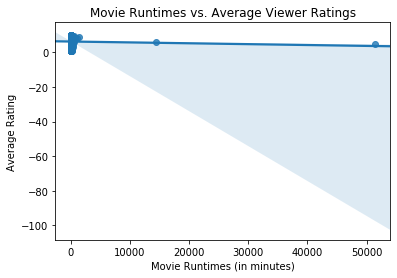

In [92]:
#Regression Plot of Runtime vs Average Rating with Outliers
sns.regplot(x= 'runtime_minutes', y= 'averagerating', data= imdb_ratings_basics_df)
plt.xlabel('Movie Runtimes (in minutes)')
plt.ylabel('Average Rating')
plt.title('Movie Runtimes vs. Average Viewer Ratings')

Text(0.5, 1.0, 'Movie Runtimes vs. Average Viewer Ratings')

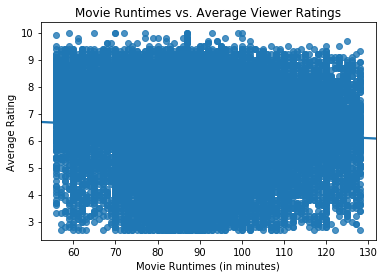

In [56]:
#Regression Plot of Runtime vs Average Rating Minus Outliers
sns.regplot(x= 'runtime_minutes', y= 'averagerating', data= ratings_basics_trim_df)
plt.xlabel('Movie Runtimes (in minutes)')
plt.ylabel('Average Rating')
plt.title('Movie Runtimes vs. Average Viewer Ratings')

Text(0.5, 1.0, 'Movie Runtimes vs. Average Viewer Ratings')

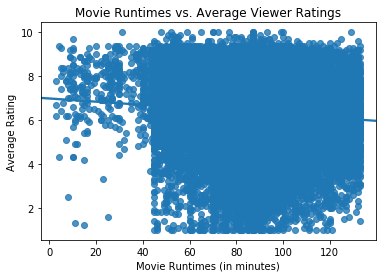

In [62]:
#Replace Outliers with Median Values
sns.regplot(x= 'runtime_minutes', y= 'averagerating', data= imdb_ratings_basics_df)
plt.xlabel('Movie Runtimes (in minutes)')
plt.ylabel('Average Rating')
plt.title('Movie Runtimes vs. Average Viewer Ratings')

Text(0.5, 1.0, 'Movie Runtimes vs. Average Viewer Ratings')

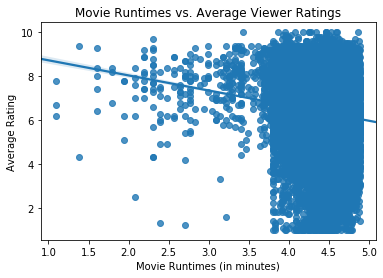

In [64]:
#Treat Outliers with Log Transformation
sns.regplot(x= 'time', y= 'averagerating', data= imdb_ratings_basics_df)
plt.xlabel('Movie Runtimes (in minutes)')
plt.ylabel('Average Rating')
plt.title('Movie Runtimes vs. Average Viewer Ratings')

Text(0.5, 1, 'Movie Runtimes vs. Average Viewer Ratings')

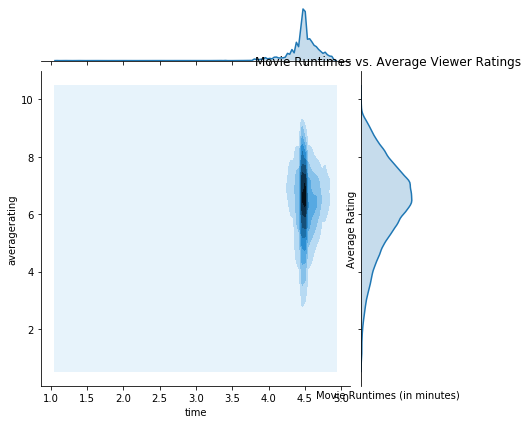

In [76]:
#Try Log Transformation Plot 
sns.jointplot(x= 'time', y= 'averagerating', data= imdb_ratings_basics_df, kind='kde')
plt.xlabel('Movie Runtimes (in minutes)')
plt.ylabel('Average Rating')
plt.title('Movie Runtimes vs. Average Viewer Ratings')

In [68]:
tn_budgets_df.cov() #Covariance of production budget, domestic gross, & worldwide

,id,production_budget,domestic_gross,worldwide_gross
id,8.306544e+02,-4.251289e+07,1.623512e+07,-4.744745e+07
production_budget,-4.251289e+07,1.748250e+15,1.956443e+15,5.466678e+15
domestic_gross,1.623512e+07,1.956443e+15,4.656779e+15,1.119394e+16
worldwide_gross,-4.744745e+07,5.466678e+15,1.119394e+16,3.052707e+16


In [69]:
tn_budgets_df.corr() #Correlation coefficient of production budget, domestic gross, & worldwide

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.035278,0.008255,-0.009422
production_budget,-0.035278,1.000000,0.685682,0.748306
domestic_gross,0.008255,0.685682,1.000000,0.938853
worldwide_gross,-0.009422,0.748306,0.938853,1.000000


**Budget vs. Domestic Gross vs Foreign Gross

<Figure size 864x576 with 0 Axes>

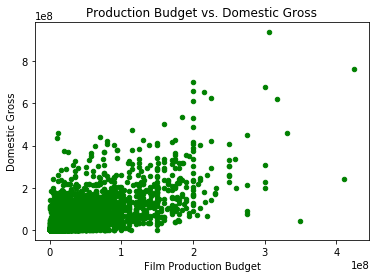

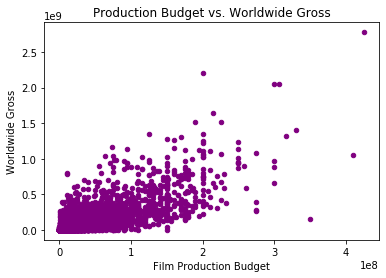

In [70]:
#Plot Production Budget vs. Domestic Gross vs Foreign Gross
budget_gross = plt.figure(figsize=(12,8))
ax = tn_budgets_df.plot.scatter(x='production_budget', y= 'domestic_gross', color= 'green', marker= 'o')
ax1 = tn_budgets_df.plot.scatter(x='production_budget', y= 'worldwide_gross', color= 'purple', marker= 'o')

ax.set_xlabel('Film Production Budget')
ax.set_ylabel('Domestic Gross')
ax.set_title('Production Budget vs. Domestic Gross')

ax1.set_xlabel('Film Production Budget')
ax1.set_ylabel('Worldwide Gross')
ax1.set_title('Production Budget vs. Worldwide Gross')

plt.show()

**Ratings by Region

In [66]:
imdb_ratings_basics_df = imdb_ratings_basics_df.rename(columns = {'primary_title' : 'title'}) 
#Rename 'primary_title' to 'title' inorder to merge imdb_ratings_basics_df and imdb_titlea_df 

In [67]:
titleakas_ratings_df = imdb_titlea_df.merge(imdb_ratings_basics_df) #Merge Title AKAs and IMDB Ratings by "title" column
titleakas_ratings_df.head()

,title_id,ordering,title,region,types,is_original_title,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,time
0,tt0369610,14,Jurassic World,FR,imdbDisplay,0.0,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,4.820282
1,tt0369610,15,Jurassic World,GR,imdbDisplay,0.0,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,4.820282
2,tt0369610,16,Jurassic World,IT,imdbDisplay,0.0,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,4.820282
3,tt0369610,20,Jurassic World,SE,imdbDisplay,0.0,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,4.820282
4,tt0369610,29,Jurassic World,US,imdbDisplay,0.0,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,4.820282


In [ ]:
#Trim Outliers

In [71]:
titleakas_ratings_df.describe()

,ordering,is_original_title,start_year,runtime_minutes,averagerating,numvotes,time
count,136688.000000,136688.000000,136688.000000,136688.000000,136688.000000,1.366880e+05,136688.000000
mean,3.545161,0.215579,2014.192819,91.657051,6.273653,1.095565e+04,4.499750
std,4.850936,0.411225,2.578841,16.292473,1.397464,5.987699e+04,0.203657
min,1.000000,0.000000,2010.000000,3.000000,1.000000,5.000000e+00,1.098612
25%,1.000000,0.000000,2012.000000,85.000000,5.400000,2.000000e+01,4.442651
50%,2.000000,0.000000,2014.000000,90.000000,6.400000,1.020000e+02,4.499810
75%,4.000000,0.000000,2016.000000,100.000000,7.200000,8.100000e+02,4.605170
max,55.000000,1.000000,2019.000000,133.000000,10.000000,1.841066e+06,4.890349


In [86]:
#n = 20
#top20 = titleakas_ratings_df.value_counts()[:n].index.tolist()
#print(top20)

for col in titleakas_ratings_df.columns: #check for extraneous values
    print(col, '\n', titleakas_ratings_df[col].value_counts().head(20), '\n\n')

title_id 
 tt5859238    72
tt0955308    68
tt2023587    61
tt1436562    60
tt2884018    54
tt4551318    53
tt0451279    48
tt4972582    48
tt4532826    48
tt4226388    48
tt1619029    45
tt2446980    45
tt3090634    45
tt3774694    44
tt3062096    42
tt2802154    42
tt6675244    41
tt2381111    40
tt2069797    40
tt1441940    40
Name: title_id, dtype: int64 


ordering 
 1     62552
2     20096
3     18915
4      9009
5      5143
6      3579
7      2523
8      2039
9      1578
10     1353
11     1074
12      977
13      844
14      752
15      690
16      680
17      559
18      511
19      448
20      405
Name: ordering, dtype: int64 


title 
 Broken         250
The Return     242
Home           240
Lucky          198
Alone          189
Paradise       168
Homecoming     162
Together       153
The Gift       136
Delirium       136
The End        133
Macbeth        132
Brothers       128
Robin Hood     128
Anna           126
Solo           126
Rage           120
Transit        110
Retr

Text(0.5, 1.0, 'Movie Showings vs. Average Viewer Ratings')

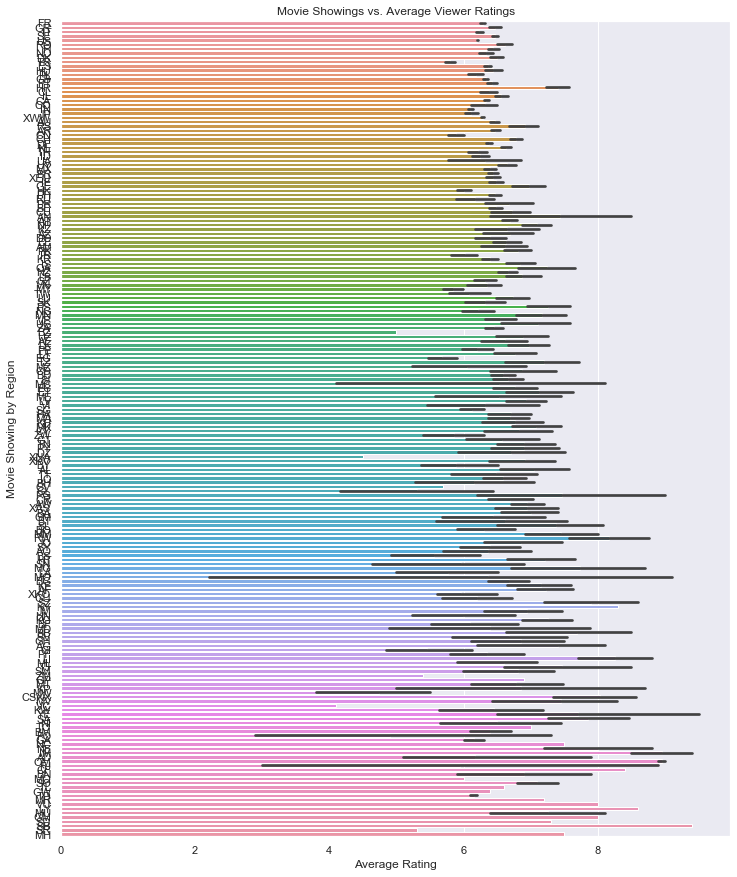

In [101]:
#Plot Regions Movies Were Shown in by Average Ratinga 
sns.set(rc={'figure.figsize':(12,15)})
region_vs_ratings = sns.barplot(x='averagerating', y='region', data=titleakas_ratings_df)
plt.ylabel('Movie Showing by Region')
plt.xlabel('Average Rating')
plt.title('Movie Showings vs. Average Viewer Ratings')

In [96]:
top15 = titleakas_ratings_df['region'].value_counts()[:15]
print(top15)
type(top15)


US     64925
XWW    15084
GB      6166
IN      5860
CA      4366
FR      3454
DE      3134
SE      2357
ES      2304
IT      2227
AU      1732
TR      1257
AR      1208
BR      1127
JP      1126
Name: region, dtype: int64


pandas.core.series.Series

Text(0.5, 1.0, 'Top 15 Regions for Movie Releases')

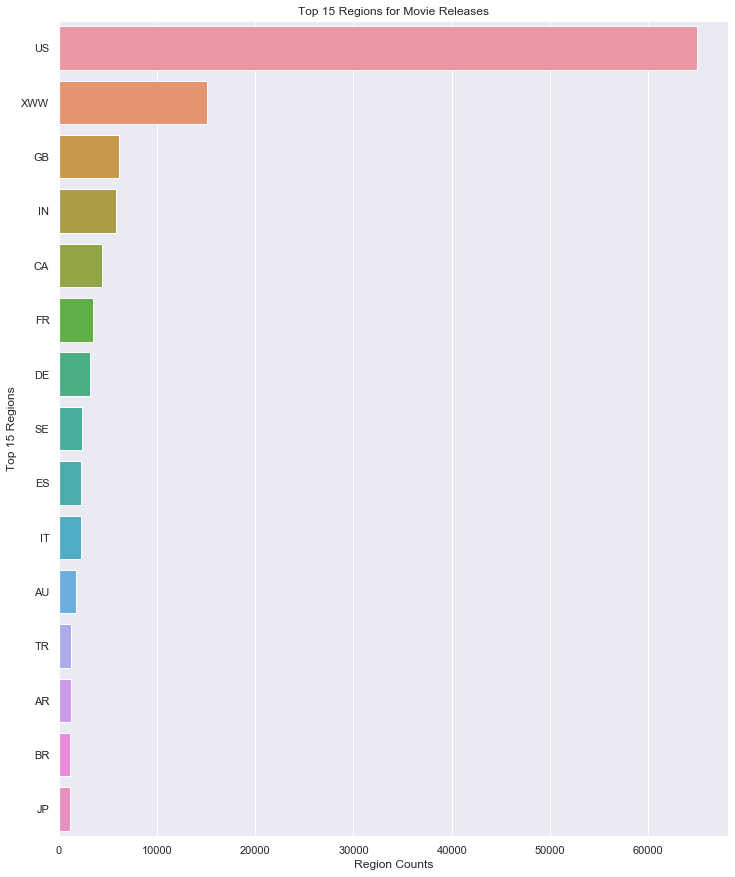

In [98]:
sns.barplot(top15.values, top15.index)
plt.ylabel('Top 15 Regions')
plt.xlabel('Region Counts')
plt.title('Top 15 Regions for Movie Releases')

Text(0.5, 1.0, 'Top 15 Regions for Movie Releases')

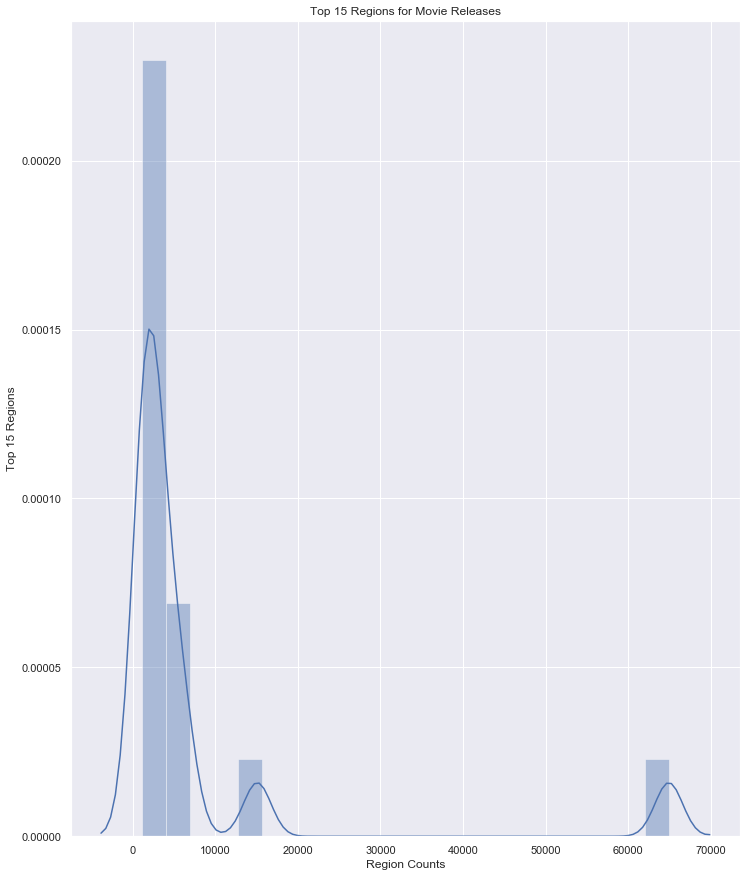

In [99]:
sns.distplot(top15)
plt.ylabel('Top 15 Regions')
plt.xlabel('Region Counts')
plt.title('Top 15 Regions for Movie Releases')